# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Matteo Iannoni</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
df['Hemisfério'] = df['Latitude'].mask(df['Latitude'] > 0, 'Norte').mask(df['Latitude'] < 0, 'Sul')

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

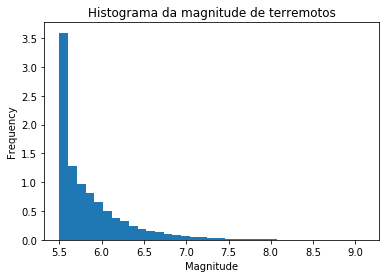

In [13]:
df.Magnitude.plot(kind='hist',bins = 35, normed = 1,title = 'Histograma da magnitude de terremotos').set_xlabel("Magnitude")

É notavel como a distribuicao da magnitude dos terremotos é do tipo exponencial, tal que a frequencia de eventos decresce exponencialmente com o aumentar da magnitude.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [8]:
expon.fit(df["Magnitude"])

(5.4999999996710809, 0.38254864885090978)

A magnitude media é de aproximadamente 5.5 e o desvio padrao da magnitudo é de 0.38.

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

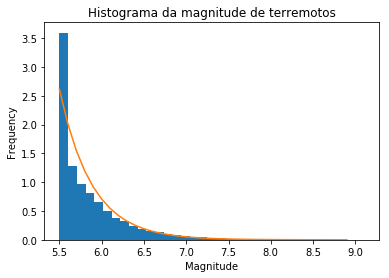

In [19]:
df.Magnitude.plot(kind='hist',bins = 35, normed = True,title = 'Histograma da magnitude de terremotos').set_xlabel("Magnitude")
plt.plot(np.arange(5.5,9,0.1),expon.pdf(np.arange(5.5,9,0.1),loc = (expon.fit(df["Magnitude"])[0]),scale = (expon.fit(df["Magnitude"])[1])), alpha = 1)


Quanto maior a magnitude, menor a frequencia relativa, portanto, menor a probabilidade de acontecer o evento.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [20]:
tab = pd.crosstab(df.Type, df.Hemisfério, normalize = True)*100
tab

Hemisfério,0.0,Norte,Sul
Type,,,
Earthquake,0.004271,44.712113,54.514779
Explosion,0.000000,0.008543,0.008543
Nuclear Explosion,0.000000,0.627883,0.119597
Rock Burst,0.000000,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

P(Earthquake ∩ Norte) = 44.712113 %

Explique o seu raciocínio

O valor na tabela equivalente à intercecção da coluna 'Earthquake' com a linha 'Norte' é 44.712113 %.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [21]:
tab.Norte["Nuclear Explosion"]/sum(tab.Norte)

0.013845719129697655

P(Nuclear Explosion | Norte) = P(Nuclear Explosion ∩ Norte)/P(Norte)

P(Nuclear Explosion | Norte) = 0.627883/45.348539

P(Nuclear Explosion | Norte) = 0.013845

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

Ta na cell em cima.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

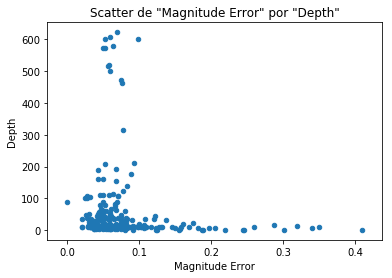

In [22]:
pd.DataFrame({
    "Magnitude Error": df['Magnitude Error'],
    "Depth": df['Depth']
}).plot.scatter('Magnitude Error', 'Depth', title = 'Scatter de "Magnitude Error" por "Depth"')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [23]:
pd.DataFrame({
    "Magnitude Error": df['Magnitude Error'],
    "Depth": df['Depth']
}).corr(method='pearson')

,Depth,Magnitude Error
Depth,1.000000,-0.076918
Magnitude Error,-0.076918,1.000000


Explique o que significa o valor da correlação calculada acima? 

O valor acima descreve a relacao LINEAR entre a informacao no eixo X e a informacao no eixo Y. 

A uma 'forca' (que pode ser interpretada como uma relacao dos valores dos eixos, com a diferença que eles tem de suas respectivas medias, com um o outro) de valor -0.076, que significa que os valores nao tem uma relacao LINEAR muito forte (por que a correlacao é proxima de zero) e que essa correlacao é negativa, entao com o aumentar da Magnitude Error, a Depth deveria diminuir.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

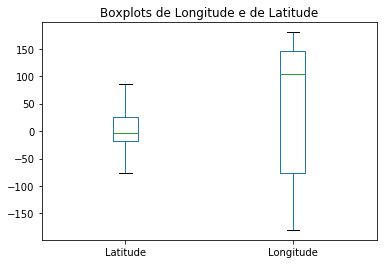

In [30]:
df_box = pd.DataFrame({
    "Latitude": df.Latitude,
    "Longitude": df.Longitude})
df_box.plot(kind = "box", title = "Boxplots de Longitude e de Latitude")

In [28]:
print("Latitude")
df_box["Latitude"].describe()

Latitude


count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [29]:
print("Longitude")
df_box["Longitude"].describe()

Longitude


count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [37]:
mb=df[df['Magnitude Type'].isin(['MB'])]
mb=df[df['Type'].isin(['Nuclear Explosion'])]
mb.Hemisfério.value_counts()

Norte    147
Sul       28
Name: Hemisfério, dtype: int64

In [39]:
#calcular P(norte) e P(sul):
pnorte=147/165
print("Norte = " + str(pnorte))

psul=28/165
print("Sul = " + str(psul))

Norte = 0.8909090909090909
Sul = 0.1696969696969697


As probabilidades indicam que quando existem tremores que sejam de Magnitude Type MB, e de Magnitude Type Nuclear Explosion, é muito provavel que o tremor tenha acontecido no hemisferio norte.